# PS7

In [159]:
"""
Author: Chittaranjan
Email: chitt@umich.edu
"""

'\nAuthor: Chittaranjan\nEmail: chitt@umich.edu\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Question 0 - Data Prep

In [4]:
superconduct_df = pd.read_csv("./superconduct/train.csv")

In [35]:
superconduct_df["material"] = pd.read_csv("./superconduct/unique_m.csv")["material"]

In [25]:
uniq_m = pd.read_csv("./superconduct/unique_m.csv")["material"]

In [19]:
from sklearn.model_selection import GroupShuffleSplit

In [37]:
X, y = split_x_y(superconduct_df, "critical_temp")
gss = GroupShuffleSplit(n_splits=1, train_size=.8, random_state=42)
tr, te = next(gss.split(X, y, superconduct_df["material"]))

In [41]:
superconduct_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84,Nb0.69Pd0.31


In [42]:
uniq_m

0               Ba0.2La1.8Cu1O4
1        Ba0.1La1.9Ag0.1Cu0.9O4
2               Ba0.1La1.9Cu1O4
3             Ba0.15La1.85Cu1O4
4               Ba0.3La1.7Cu1O4
                  ...          
21258        Tm0.84Lu0.16Fe3Si5
21259           Tl1Ba2Ca3Cu4O11
21260                Nb0.8Pd0.2
21261              Nb0.69Pd0.31
21262             Fe1Se0.2Te0.8
Name: material, Length: 21263, dtype: object

In [34]:
y.iloc[tr]

0         29.00
1         26.00
3         22.00
4         23.00
5         23.00
          ...  
21254      3.00
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 16989, dtype: float64

In [162]:
TRAIN_SIZE = 0.8
TEST_SIZE = 0.1
VALIDATION_SIZE = 0.1

In [163]:
def train_test_validation_split(data,
                                train_size,
                                test_size,
                                validation_size
                                ):
    """
    Split a dataset into training, testing, and validation sets

    Parameters
    ----------
    data : DataFrame
        The complete data which needs to be split.
    train_size : float
        Proportion of training data.
    test_size : float
        Proportion of testing data.
    validation_size : float
        Proportion of validation data.

    Returns
    -------
    tuple
        Three dataframes for train, test, validation as per proportions.

    """
    train, test_and_valid = train_test_split(
        superconduct_df,
        train_size=train_size,
        test_size=test_size + validation_size
    )
    validation, test = train_test_split(
        test_and_valid,
        train_size=validation_size / (test_size + validation_size),
        test_size=test_size / (test_size + validation_size)
    )
    return (
        train.reset_index(drop=True),
        test.reset_index(drop=True),
        validation.reset_index(drop=True)
    )

In [164]:
train, test, validation = train_test_validation_split(
    superconduct_df,
    TRAIN_SIZE,
    TEST_SIZE,
    VALIDATION_SIZE
)

In [165]:
assert superconduct_df.shape[0] == (
    train.shape[0] +
    test.shape[0] +
    validation.shape[0]
)

In [21]:
def split_x_y(data, y_col):
    """
    Splits a dataset in X and y as per regular definition of predictors 
    and response 

    Parameters
    ----------
    data : DataFrame
        The dataset which needs to be split into X and y.
    y_col : str
        Name of response column in `data`.

    Returns
    -------
    list
        X and y dataframes, split based on `y_col`.

    """
    return [data[y_col], data.drop(y_col, axis=1)][::-1]

In [167]:
train_X, train_y = split_x_y(train, "critical_temp")
test_X, test_y = split_x_y(test, "critical_temp")
validation_X, validation_y = split_x_y(validation, "critical_temp")

## Question 1 - Training and Tuning Models

#### Utility Functions

In [168]:
def clean_text(p): return " ".join(
    p.split("param_")[1].split("_")).capitalize()

In [169]:
def make_mse_summary(metrics, param1, param2):
    """
    Utility function to build summary table of MSE values across all values
    of two hyperparameters

    Parameters
    ----------
    metrics : DataFrame
        MSE values across all hyperparameters in long format.
    param1, param2 : str
        Names of hyperparameters, should be prefixed with "param_".

    Returns
    -------
    DataFrame
        Grid with param1 values as row index and param2 values as column index.
        Each cell contains the MSE value corresponding to hyperparameter values

    """
    mse_summary = metrics[
        [param1, param2, "mean_test_score"]
    ].pivot(index=param1, columns=[param2])
    mse_summary.columns = list(map(lambda x: x[1], mse_summary.columns))
    mse_summary.index.name = clean_text(param1)
    mse_summary.columns.name = clean_text(param2)
    return abs(mse_summary.round(2))

In [170]:
def make_scatter(metrics, param1, param2, xlog=False):
    """
    Utility function to plot variation of MSE values across all values of 
    two hyperparameters

    Parameters
    ----------
    metrics : DataFrame
        MSE values across all hyperparameters in long format.
    param1, param2 : str
        Names of hyperparameters, should be prefixed with "param_".
    xlog : boolean, optional
        Sets x-axis scale as 'log' (linear by default). The default is False.

    Returns
    -------
    None.

    """
    plt.scatter(
        metrics[param1],
        metrics[param2],
        c=abs(metrics.mean_test_score)
    )
    if xlog:
        plt.xscale('log')
    cbar = plt.colorbar()
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel("MSE Color Mapping", rotation=270)
    plt.xlabel(clean_text(param1))
    plt.ylabel(clean_text(param2))
    plt.title("MSE values for Grid Search")

#### Grid Search with 10-Fold Cross Validation

In [171]:
en = ElasticNet(max_iter=100000)
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [172]:
en_parameters = {
    "alpha": (1e-04, 1e-03, 1e-02, 1e-01),
    "l1_ratio": [.1, .5, .7, .9, .95, .99, 1]
}
en_grid_search = GridSearchCV(en,
                              en_parameters,
                              cv=10,
                              scoring="neg_mean_squared_error",
                              n_jobs=-1,
                              verbose=0
                              )

In [173]:
rf_parameters = {
    "n_estimators": (100, 200, 300, 400, 500),
    "max_depth": [6, 8, 10, 12, 14, 16]
}
rf_grid_search = GridSearchCV(rf,
                              rf_parameters,
                              cv=10,
                              scoring="neg_mean_squared_error",
                              n_jobs=-1,
                              verbose=0
                              )

In [174]:
gb_parameters = {
    "n_estimators": (100, 200, 300, 400, 500),
    "learning_rate": [0.2, 0.35, 0.37, 0.4, 0.42, 0.45, 0.6]
}
gb_grid_search = GridSearchCV(gb,
                              gb_parameters,
                              cv=10,
                              scoring="neg_mean_squared_error",
                              n_jobs=-1,
                              verbose=0
                              )

### Elastic Net

In [175]:
en_res = en_grid_search.fit(train_X, train_y)

/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.203e+04, tolerance: 1.802e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+05, tolerance: 1.802e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+04, tolerance: 1.801e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.968e+04, tolerance: 1.802e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+05, tolerance: 1.809e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+05, tolerance: 1.797e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+03, tolerance: 1.798e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.114e+03, tolerance: 1.796e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/507b/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

In [176]:
en_res.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.99, max_iter=100000)

The best Elastic Net Regressor identified as per cross validated MSE
has `alpha=0.0001` and `l1_ratio=0.99`

#### Summary of MSE values across `l1_ratio` and `alpha`

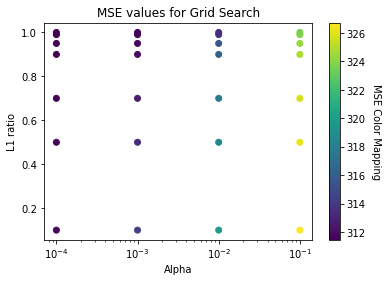

In [177]:
en_df = pd.DataFrame(en_res.cv_results_)
make_scatter(en_df, "param_alpha", "param_l1_ratio", xlog=True)

In [178]:
make_mse_summary(en_df, "param_l1_ratio", "param_alpha")

Alpha,0.0001,0.0010,0.0100,0.1000
L1 ratio,,,,
0.10,311.74,314.37,319.70,326.74
0.50,311.60,313.38,318.58,326.24
0.70,311.53,312.71,317.72,325.74
0.90,311.45,311.95,316.23,324.80
0.95,311.44,311.77,315.40,324.39
0.99,311.44,311.63,313.97,323.88
1.00,311.44,311.59,313.39,323.74


### Random Forest

In [179]:
rf_res = rf_grid_search.fit(train_X, train_y)

In [180]:
rf_res.best_estimator_

RandomForestRegressor(max_depth=16, n_estimators=500)

The best Random Forest Regressor identified as per cross validated
MSE has `max_depth=16` and `n_estimators=500`

#### Summary of MSE values across `n_estimators` and `max_depth`

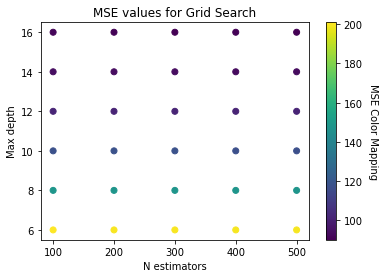

In [181]:
rf_df = pd.DataFrame(rf_res.cv_results_)
make_scatter(rf_df, "param_n_estimators", "param_max_depth")

In [182]:
make_mse_summary(rf_df, "param_n_estimators", "param_max_depth")

Max depth,6,8,10,12,14,16
N estimators,,,,,,
100,200.96,148.52,117.61,101.71,94.17,91.58
200,199.67,147.92,117.88,101.03,93.80,90.61
300,199.75,147.89,117.87,101.20,93.69,90.52
400,199.44,147.94,117.33,100.98,93.27,90.70
500,199.66,147.80,117.41,101.28,93.48,90.14


### Gradient Boosted Trees

In [183]:
gb_res = gb_grid_search.fit(train_X, train_y)

In [184]:
gb_res.best_estimator_

GradientBoostingRegressor(learning_rate=0.2, n_estimators=500)

The best Gradient Boosted Regressor identified as per cross
validated MSE has `learning_rate=0.2` and `n_estimators=500`

#### Summary of MSE values across `n_estimators` and `learning_rate`

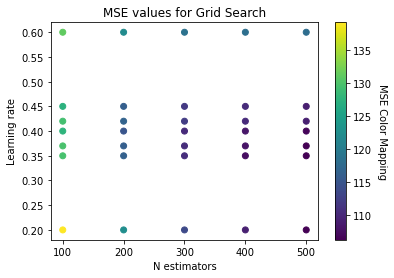

In [185]:
gb_df = pd.DataFrame(gb_res.cv_results_)
make_scatter(gb_df, "param_n_estimators", "param_learning_rate")

In [186]:
make_mse_summary(gb_df, "param_n_estimators", "param_learning_rate")

Learning rate,0.20,0.35,0.37,0.40,0.42,0.45,0.60
N estimators,,,,,,,
100,139.24,129.63,129.80,127.68,129.44,127.29,131.16
200,122.39,116.42,116.15,114.96,116.59,116.12,122.10
300,113.72,110.57,110.40,110.22,112.15,111.89,118.72
400,109.18,107.46,107.94,108.31,110.14,110.36,118.24
500,106.26,106.28,106.29,106.70,109.15,109.02,117.91


## Q2 - Validation and Testing

In [187]:
def train_best(cve, X, y):
    """
    Trains the best estimator (as per 10-fold CV using MSE) against X and y

    Parameters
    ----------
    cve : GridSearchCV
        object which has info about best estimator and corresponding 
        hyperparameter values.
    X : DataFrame
        Predictor column values of dataset.
    y : DataFrame
        Response column values of dataset corresponding to X.

    Returns
    -------
    Estimator
        object fitted with X and y, using best estimator hyperparameter values.

    """
    return cve.best_estimator_.fit(X, y)

In [188]:
en_final = train_best(en_res, train_X, train_y)
rf_final = train_best(rf_res, train_X, train_y)
gb_final = train_best(gb_res, train_X, train_y)

### Validation

In [189]:
validation_summary = pd.DataFrame({
    "MSE": [
        mean_squared_error(en_final.predict(validation_X), validation_y),
        mean_squared_error(rf_final.predict(validation_X), validation_y),
        mean_squared_error(gb_final.predict(validation_X), validation_y)
    ],
    "R^2": [
        en_final.score(validation_X, validation_y),
        rf_final.score(validation_X, validation_y),
        gb_final.score(validation_X, validation_y)
    ]
}, index=["Elastic Net", "Random Forest", "Gradient Boosted Trees"])

In [190]:
validation_summary.round(3)

,MSE,R^2
Elastic Net,321.801,0.727
Random Forest,87.733,0.926
Gradient Boosted Trees,103.542,0.912


In [191]:
rf_res.best_estimator_

RandomForestRegressor(max_depth=16, n_estimators=500)

Random Forest (with `max_depth=16`, `n_estimators=500`)
performs the best on the validation set

### Test

In [192]:
test_summary = pd.DataFrame({
    "MSE": [
        mean_squared_error(rf_final.predict(test_X), test_y),
    ],
    "R^2": [
        rf_final.score(test_X, test_y),
    ]
}, index=["Random Forest"])

In [193]:
test_summary.round(2)

,MSE,R^2
Random Forest,85.74,0.93


 It is observed that the Random Forest model has an MSE of
`85.74` on the test set, and an $R^2$ of `0.93`